In [43]:
from verispy import VERIS
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
data_dir="validated"
v = VERIS(json_dir=data_dir)
print (v.schema_url)

Found 8543 json files.
https://raw.githubusercontent.com/vz-risk/veris/master/verisc-merged.json


In [2]:
veris_df = v.json_to_df(verbose=True)

Loading schema
Loading JSON files to DataFrame.


100%|██████████| 8543/8543 [00:31<00:00, 270.77it/s]


Finished loading JSON files to dataframe.
Dropped 5 rows with duplicated incident_id values.
Building DataFrame with enumerations.
Building enumeration columns.


  5%|▌         | 9/173 [00:00<00:02, 66.18it/s]c:\users\raheel\appdata\local\programs\python\python37\lib\site-packages\verispy\veris.py:196: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  comb_df[newvarname] = raw_df[col].apply(lambda x: var_amt_enum_checker(x, item, variety_or_amt))
c:\users\raheel\appdata\local\programs\python\python37\lib\site-packages\verispy\veris.py:190: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  comb_df[newvarname] = raw_df[col].apply(lambda x: enum_checker(x, item))
c:\users\raheel\appdata\local\pro

Done building DataFrame with enumerations.
Post-Processing DataFrame (A4 Names, Victim Industries, Patterns)
Finished building VERIS DataFrame


# Start of Data Analysis

### Get percentage of action types

<AxesSubplot:title={'center':'Number of incidents for each action type'}, xlabel='Action type', ylabel='Number of incidents'>

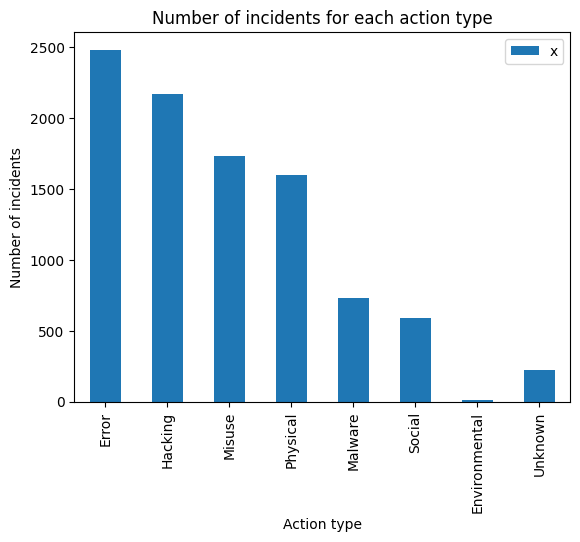

In [33]:
summary = v.enum_summary(veris_df, "action")

new_summary = summary[['enum','x']]
new_summary.set_index('enum', inplace=True)
new_summary.plot(kind="bar", title="Number of incidents for each action type",
                 xlabel="Action type", ylabel="Number of incidents")


### Effect of action type on variety of assets compromised

<AxesSubplot:title={'center':'Number of asset type compromised for incidents caused by physical means'}, xlabel='Asset type', ylabel='Number of incidents'>

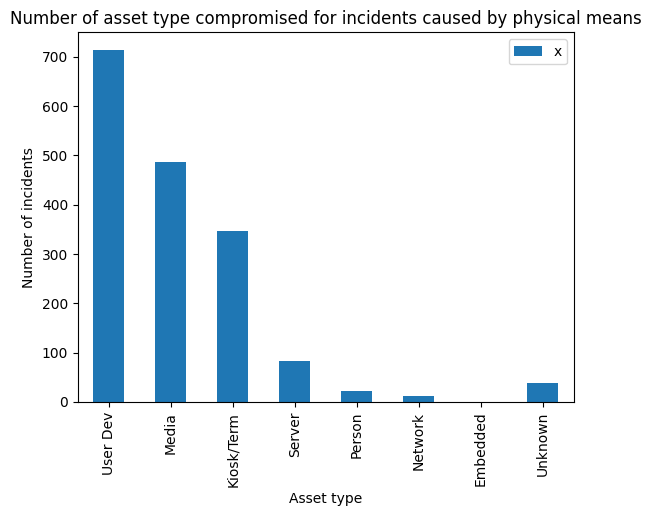

In [31]:
filter = veris_df['action.Physical']
summary = v.enum_summary(veris_df[filter], 'asset.variety')

new_summary = summary[['enum','x']]
new_summary.set_index('enum', inplace=True)
new_summary.plot(kind="bar", title="Number of asset type compromised for incidents caused by physical means",
                 xlabel="Asset type", ylabel="Number of incidents")

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Maecenas finibus eleifend bibendum. Phasellus nec quam eget diam porttitor egestas vel rutrum nibh

<AxesSubplot:title={'center':'Number of asset type compromised for incidents caused by hacking'}, xlabel='Asset type', ylabel='Number of incidents'>

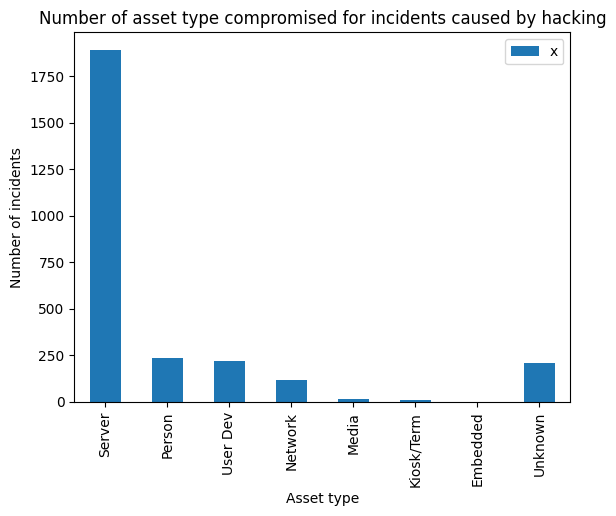

In [30]:
filter = veris_df['action.Hacking']
summary = v.enum_summary(veris_df[filter], 'asset.variety')

new_summary = summary[['enum','x']]
new_summary.set_index('enum', inplace=True)
new_summary.plot(kind="bar", title="Number of asset type compromised for incidents caused by hacking",
                 xlabel="Asset type", ylabel="Number of incidents")

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Maecenas finibus eleifend bibendum. Phasellus nec quam eget diam porttitor egestas vel rutrum nibh

<AxesSubplot:title={'center':'Number of asset type compromised for incidents caused by social means'}, xlabel='Asset type', ylabel='Number of incidents'>

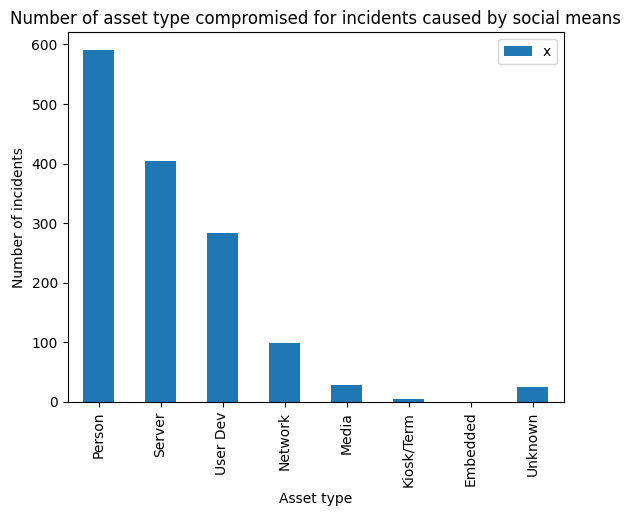

In [34]:
filter = veris_df['action.Social']
summary = v.enum_summary(veris_df[filter], 'asset.variety')

new_summary = summary[['enum','x']]
new_summary.set_index('enum', inplace=True)
new_summary.plot(kind="bar", title="Number of asset type compromised for incidents caused by social means",
                 xlabel="Asset type", ylabel="Number of incidents")

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Maecenas finibus eleifend bibendum. Phasellus nec quam eget diam porttitor egestas vel rutrum nibh

<AxesSubplot:title={'center':'Number of asset type compromised for incidents caused by error'}, xlabel='Asset type', ylabel='Number of incidents'>

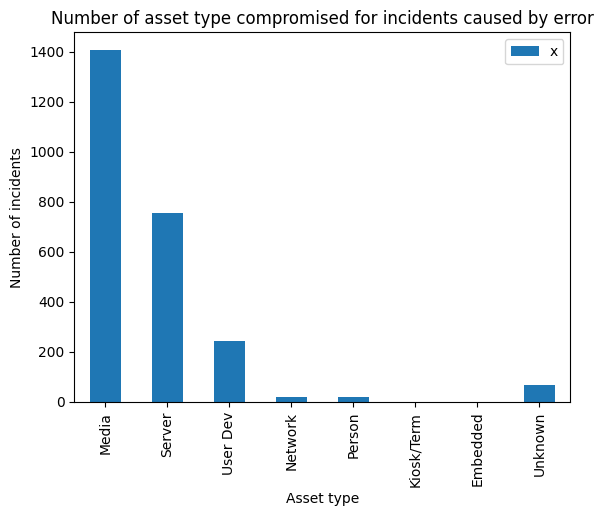

In [35]:
filter = veris_df['action.Error']
summary = v.enum_summary(veris_df[filter], 'asset.variety')

new_summary = summary[['enum','x']]
new_summary.set_index('enum', inplace=True)
new_summary.plot(kind="bar", title="Number of asset type compromised for incidents caused by error",
                 xlabel="Asset type", ylabel="Number of incidents")

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Maecenas finibus eleifend bibendum. Phasellus nec quam eget diam porttitor egestas vel rutrum nibh

<AxesSubplot:title={'center':'Number of asset type compromised for incidents caused by environmental damages'}, xlabel='Asset type', ylabel='Number of incidents'>

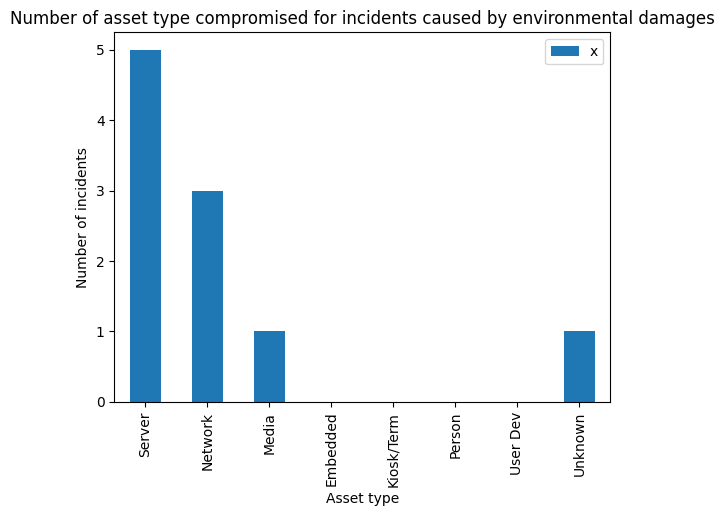

In [36]:
filter = veris_df['action.Environmental']
summary = v.enum_summary(veris_df[filter], 'asset.variety')

new_summary = summary[['enum','x']]
new_summary.set_index('enum', inplace=True)
new_summary.plot(kind="bar", title="Number of asset type compromised for incidents caused by environmental damages",
                xlabel="Asset type", ylabel="Number of incidents")

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Maecenas finibus eleifend bibendum. Phasellus nec quam eget diam porttitor egestas vel rutrum nibh

### Effect of action type on the motives for incidents

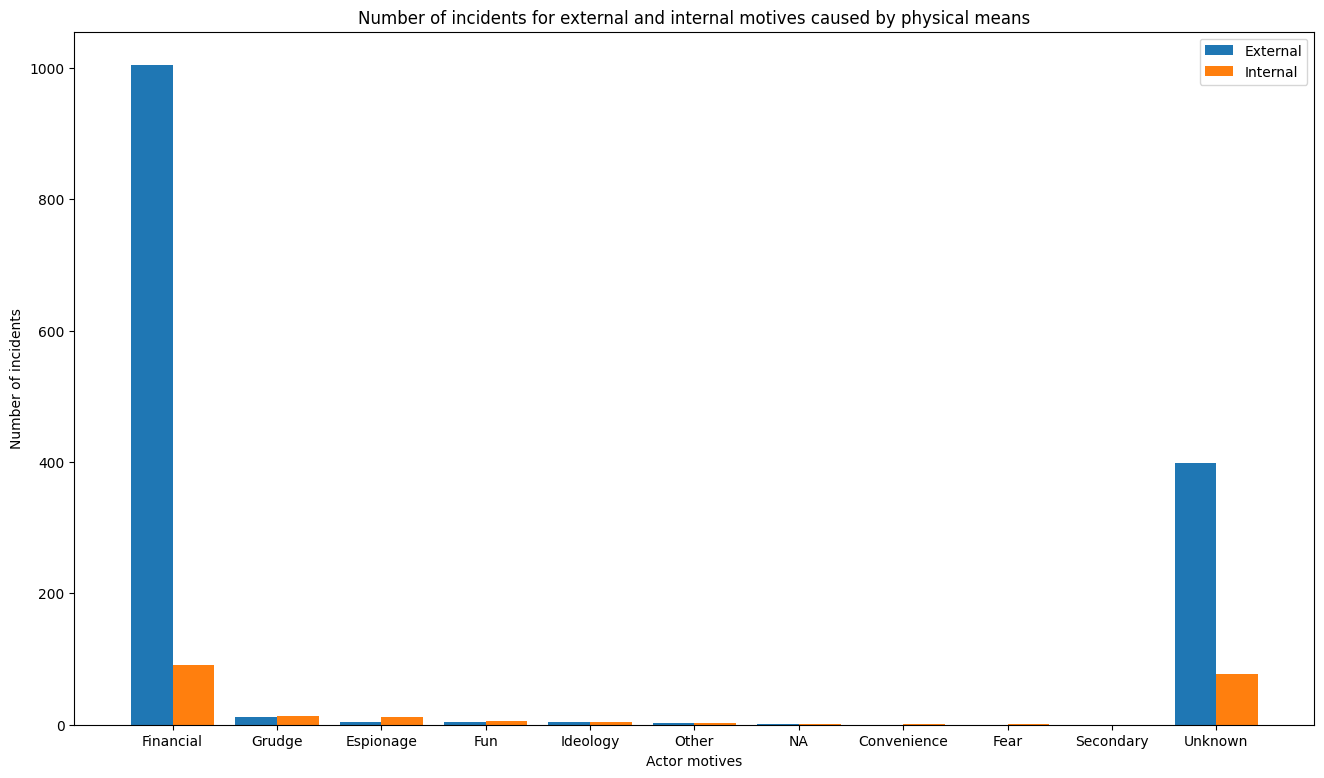

In [69]:
filter = veris_df['action.Physical']
summary_ext = v.enum_summary(veris_df[filter], 'actor.external.motive')
summary_int = v.enum_summary(veris_df[filter], 'actor.internal.motive')

X = summary_ext['enum']
External = summary_ext['x']
Internal = summary_int['x']

X_axis = np.arange(len(X))
plt.rcParams["figure.figsize"] = [16,9]
plt.bar(X_axis - 0.2, External, 0.4, label = 'External')
plt.bar(X_axis + 0.2, Internal, 0.4, label = 'Internal')

plt.xticks(X_axis, X)
plt.xlabel("Actor motives")
plt.ylabel("Number of incidents")
plt.title("Number of incidents for external and internal motives caused by physical means")
plt.legend()
plt.show()


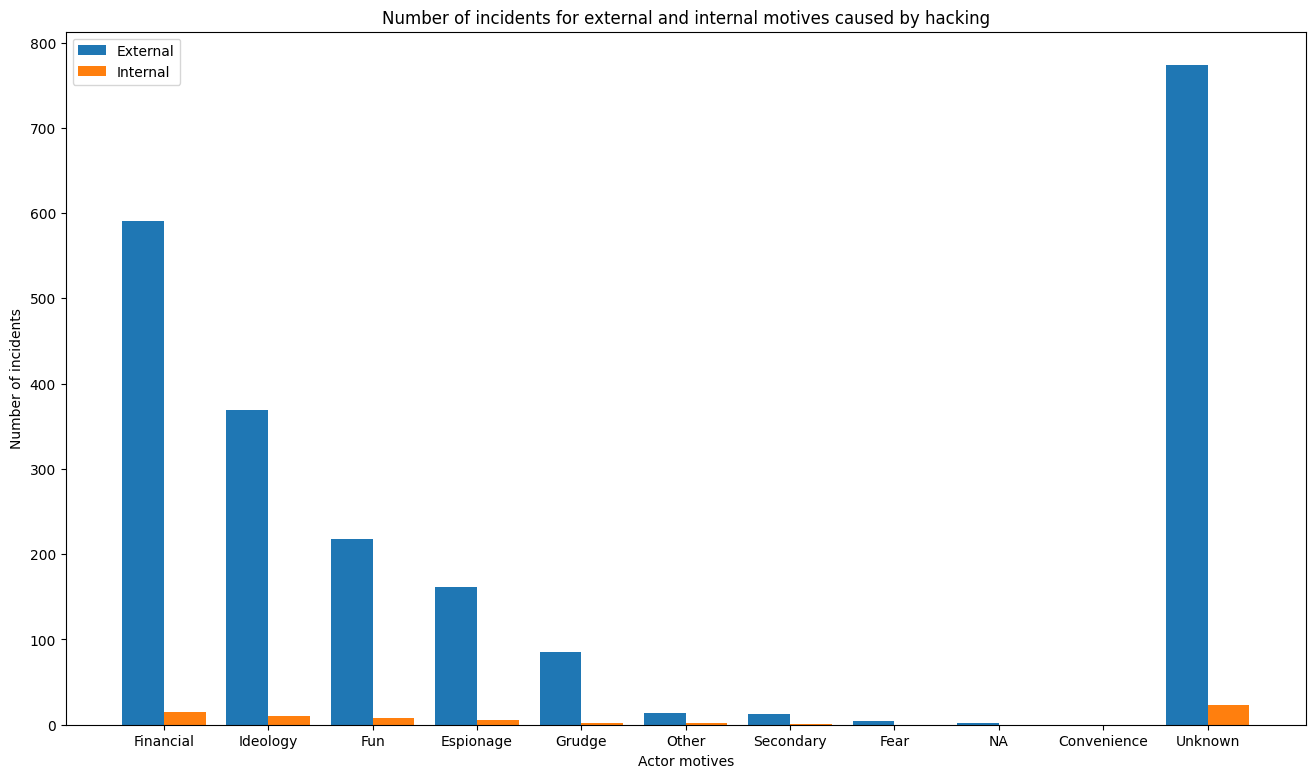

In [68]:
filter = veris_df['action.Hacking']
summary_ext = v.enum_summary(veris_df[filter], 'actor.external.motive')
summary_int = v.enum_summary(veris_df[filter], 'actor.internal.motive')

X = summary_ext['enum']
External = summary_ext['x']
Internal = summary_int['x']

X_axis = np.arange(len(X))
plt.rcParams["figure.figsize"] = [16,9]
plt.bar(X_axis - 0.2, External, 0.4, label = 'External')
plt.bar(X_axis + 0.2, Internal, 0.4, label = 'Internal')

plt.xticks(X_axis, X)
plt.xlabel("Actor motives")
plt.ylabel("Number of incidents")
plt.title("Number of incidents for external and internal motives caused by hacking")
plt.legend()
plt.show()

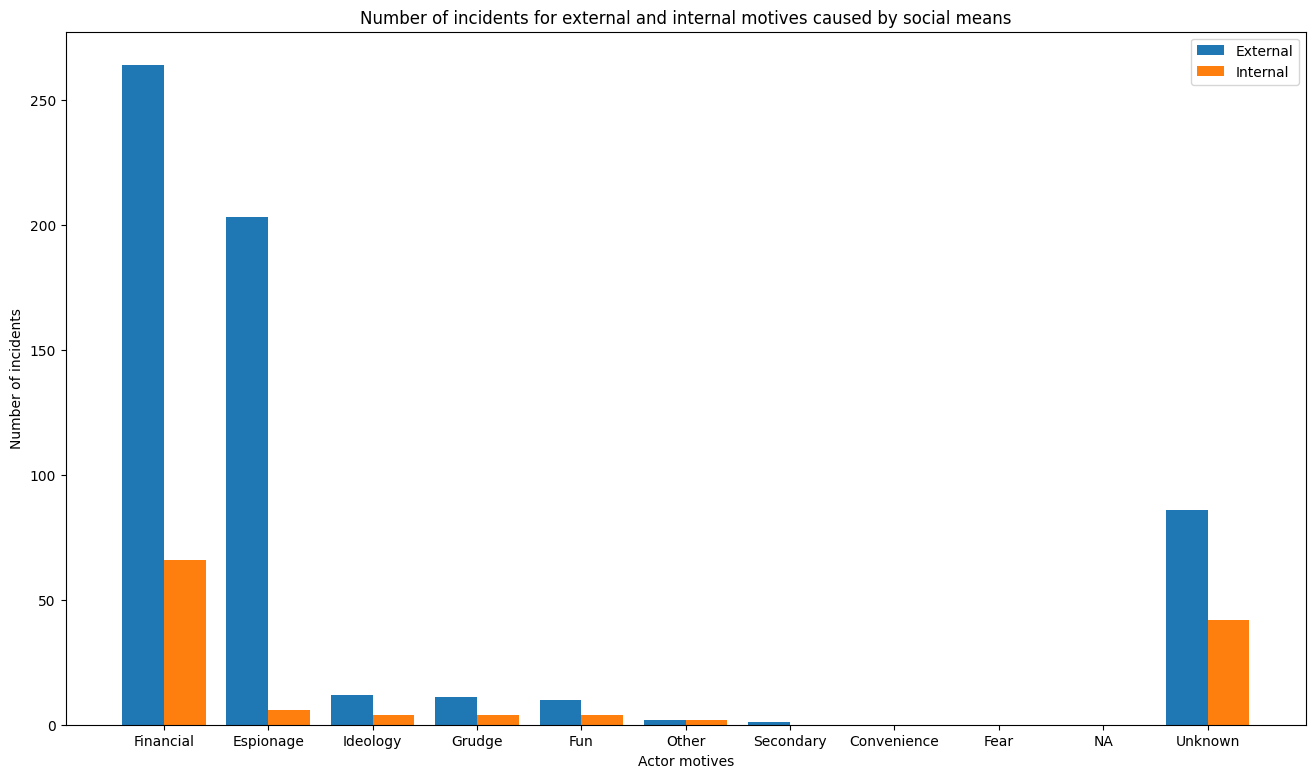

In [67]:
filter = veris_df['action.Social']
summary_ext = v.enum_summary(veris_df[filter], 'actor.external.motive')
summary_int = v.enum_summary(veris_df[filter], 'actor.internal.motive')

X = summary_ext['enum']
External = summary_ext['x']
Internal = summary_int['x']

X_axis = np.arange(len(X))
plt.rcParams["figure.figsize"] = [16,9]
plt.bar(X_axis - 0.2, External, 0.4, label = 'External')
plt.bar(X_axis + 0.2, Internal, 0.4, label = 'Internal')

plt.xticks(X_axis, X)
plt.xlabel("Actor motives")
plt.ylabel("Number of incidents")
plt.title("Number of incidents for external and internal motives caused by social means")
plt.legend()
plt.show()


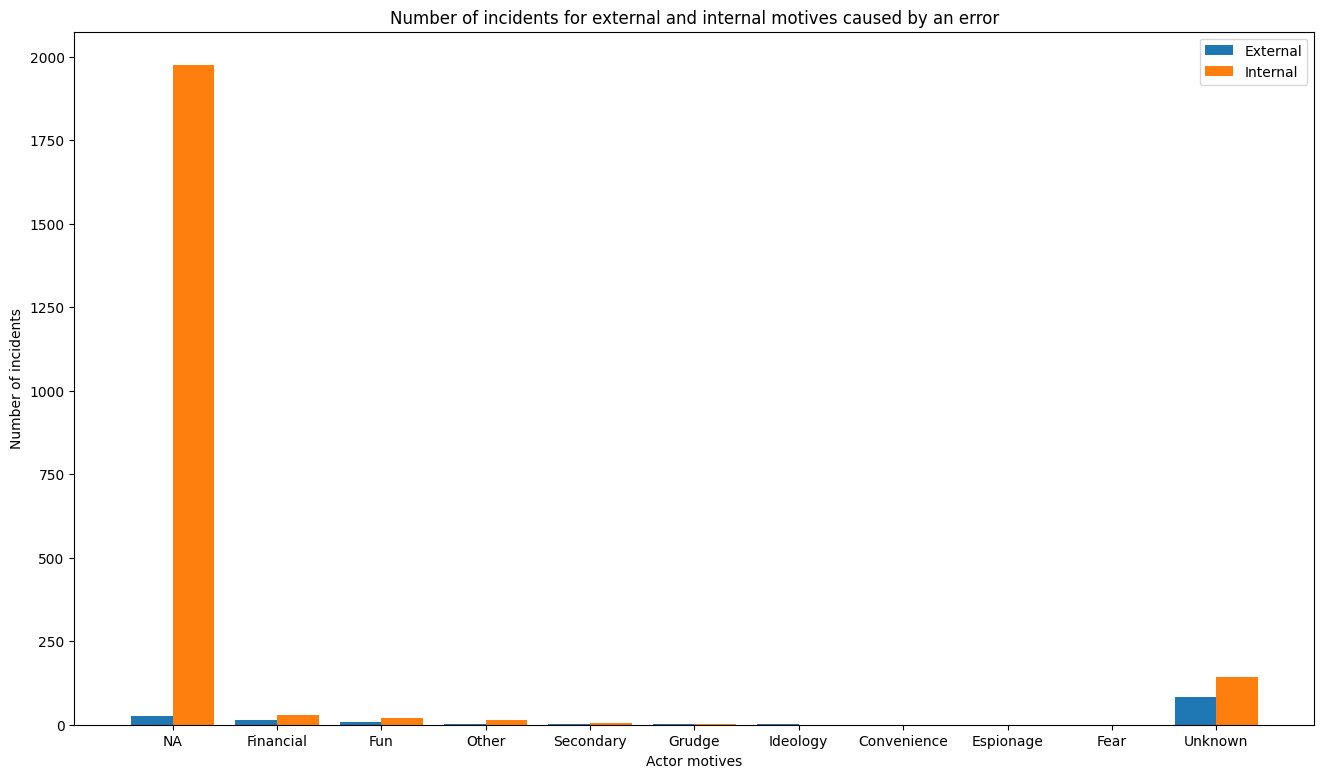

In [74]:
filter = veris_df['action.Error']
summary_ext = v.enum_summary(veris_df[filter], 'actor.external.motive')
summary_int = v.enum_summary(veris_df[filter], 'actor.internal.motive')

X = summary_ext['enum']
External = summary_ext['x']
Internal = summary_int['x']

X_axis = np.arange(len(X))
plt.rcParams["figure.figsize"] = [16,9]
plt.bar(X_axis - 0.2, External, 0.4, label = 'External')
plt.bar(X_axis + 0.2, Internal, 0.4, label = 'Internal')

plt.xticks(X_axis, X)
plt.xlabel("Actor motives")
plt.ylabel("Number of incidents")
plt.title("Number of incidents for external and internal motives caused by an error")
plt.legend()
plt.show()

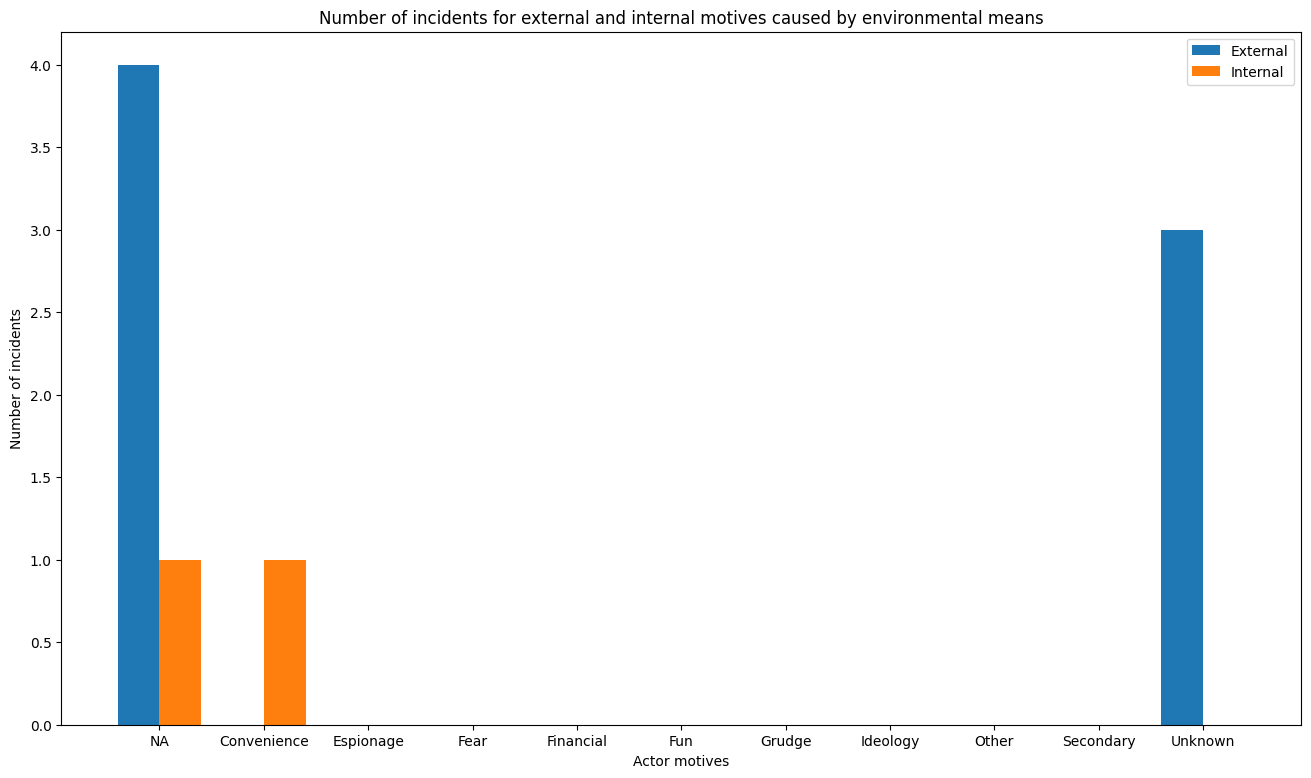

In [71]:
filter = veris_df['action.Environmental']
summary_ext = v.enum_summary(veris_df[filter], 'actor.external.motive')
summary_int = v.enum_summary(veris_df[filter], 'actor.internal.motive')

X = summary_ext['enum']
External = summary_ext['x']
Internal = summary_int['x']

X_axis = np.arange(len(X))
plt.rcParams["figure.figsize"] = [16,9]
plt.bar(X_axis - 0.2, External, 0.4, label = 'External')
plt.bar(X_axis + 0.2, Internal, 0.4, label = 'Internal')

plt.xticks(X_axis, X)
plt.xlabel("Actor motives")
plt.ylabel("Number of incidents")
plt.title("Number of incidents for external and internal motives caused by environmental means")
plt.legend()
plt.show()
